# Data Cleaning & EDA

Load up 4 different datasets, clean, explore.

1. Airline Tweet Sentiments dataset | https://data.world/crowdflower/airline-twitter-sentiment

2. Apple Tweet Sentiment dataset | https://data.world/crowdflower/apple-twitter-sentiment

3. Sentiment 140 dataset | https://www.kaggle.com/datasets/kazanova/sentiment140/

4. Tweet 4 Sentiment Analysis dataset | http://www.t4sa.it

## Imports

In [2]:
import boto3
import pandas as pd

# To ignore SetOnCopyWarning
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

## Airline Tweet Data

In [3]:
# AWS code to load data from s3
s3 = boto3.client('s3')
obj = s3.get_object(Bucket = 'rawdatatweets',Key = 'Data/Airline-Sentiment-2-w-AA.csv')

# Load up airline data, ignore encoding errors
airline_df = pd.read_csv(obj['Body'], encoding='utf-8', encoding_errors='ignore')

airline_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [4]:
# Check for duplicates
airline_df.duplicated().value_counts()

False    14640
dtype: int64

No duplicates! Let's drop the info we don't need. We'll keep sentiment confidence for now in case we want to filter using that metric later.

In [5]:
# Drop all cols except sentiment, confidence and tweet
airline_df = airline_df[['airline_sentiment', 'airline_sentiment:confidence', 'text']]

# Rename cols to 'sentiment', 'confidence' and 'tweet'
airline_df.rename(columns={'airline_sentiment':'sentiment', 'airline_sentiment:confidence':'confidence', 
                           'text':'tweet'}, inplace=True)

# Inspect
airline_df.head(3)

,sentiment,confidence,tweet
0,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...


In [6]:
airline_df.sentiment.value_counts(dropna=False)

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

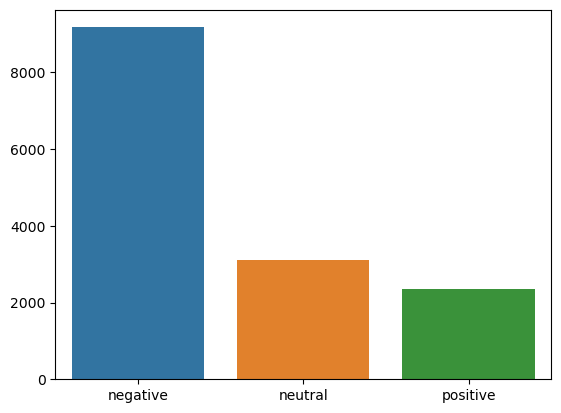

In [7]:
# Bar plot
sns.barplot(x = airline_df.sentiment.value_counts().index, 
             y = airline_df.sentiment.value_counts().values);

Okay, so this one is pretty imbalanced. We will look later at the balance of the entire dataset and may want to come back to deal with imbalances in each individual dataset prior to concatenation.

Let's also decide how we want to encode our classes and go ahead with that.
 - Negative: 0
 - Neutral: 1
 - Positive: 2

In [8]:
# Replace sentiment strings with integer labels
airline_df.sentiment.replace(['negative', 'neutral', 'positive'],[0, 1, 2], inplace=True)

# Recast sentiment as integer
airline_df.sentiment = airline_df.sentiment.astype('int')

# Inspect
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   14640 non-null  int64  
 1   confidence  14640 non-null  float64
 2   tweet       14640 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 343.2+ KB


In [9]:
airline_df.head()

,sentiment,confidence,tweet
0,1,1.0000,@VirginAmerica What @dhepburn said.
1,2,0.3486,@VirginAmerica plus you've added commercials t...
2,1,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,@VirginAmerica and it's a really big bad thing...


Let's do the next dataset now.

## Apple Tweet Data

In [10]:
# AWS code to load data from s3
obj = s3.get_object(Bucket = 'rawdatatweets',Key = 'Data/Apple-Twitter-Sentiment-DFE.csv')

# Load up data, ignore encoding errors
apple_df = pd.read_csv(obj['Body'], encoding='utf-8', encoding_errors='ignore')

apple_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [11]:
# Check for duplicates
apple_df.duplicated().value_counts()

False    3886
dtype: int64

In [12]:
# Drop all cols except sentiment, confidence and tweet
apple_df = apple_df[['sentiment', 'sentiment:confidence', 'text']]

# Rename cols to 'confidence' and 'tweet'
apple_df.rename(columns={'sentiment:confidence':'confidence', 'text':'tweet'}, inplace=True)

# Inspect
apple_df.head(3)

,sentiment,confidence,tweet
0,3,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,1.0000,My cat only chews @apple cords. Such an #Apple...


In [13]:
apple_df.sentiment.value_counts(dropna=False)

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

After scouring the data source, we could not find any key that pairs the integers with labels. We will have to dig ourselves to find out what the labels on the tweets are.

In [14]:
with pd.option_context('display.max_colwidth', None):
  display(apple_df[apple_df['sentiment'] == '1'].head(10))

,sentiment,confidence,tweet
10,1,1.0000,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW IS 29% WTF IS THIS @apple
14,1,1.0000,@apple Contact sync between Yosemite and iOS8 is seriously screwed up. It used to be much more stable in the past. #icloud #isync
16,1,0.9399,WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM @APPLE IPHONE YOU CANNOT USE IT ON VERIZON NETWORK
23,1,1.0000,"@Apple, For the love of GAWD, CENTER the '1'on the damn calendar app. You fixed it once, its back, off center, AGAIN! http://t.co/dMyAHEm1Lc"
24,1,0.8928,i get the storage almost full notification literally every 5 minutes chill @apple
25,1,0.8558,I had to do made the #switch from iPhone 6 to the galaxy note edge. @apple keep up http://t.co/1Vve1htP0n
26,1,0.8701,@ me RT @101Baemations: Can't stand those ppl with @Apple stickers everywhere. 9/10 they prob just bought an iPod shuffle
39,1,0.4673,That flash crash really screwed with a lot of traders today. Not me. Im more determined than ever to make trading work for me #AAPL
41,1,0.7453,Nigga update yall headphones @Apple
43,1,0.6650,RT @thehill: Justice Department cites 18th century federal law to get @Apple to unlock iPhones: http://t.co/Eth0QpAIom


Looks like the '1' label is for negative tweets.

In [15]:
with pd.option_context('display.max_colwidth', None):
  display(apple_df[apple_df['sentiment'] == '5'].head(10))

,sentiment,confidence,tweet
6,5,0.8468,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7,5,0.6736,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
13,5,1.0000,RT @peterpham: Bought my @AugustSmartLock at the @apple store..pretty good logo match . can't wait to install it! http://t.co/z8VKMhbnR3
28,5,0.5724,Latest Apple Products Leading in Efficiency http://t.co/KHeNlVT1FJ @apple #iPhone #iPad #plugloads
33,5,1.0000,RT @saxonidubom: @rwang0 @Apple Thanks...thinking of upgrading.
68,5,0.8214,Photo: Love IOS 8 @apple @iphone #Love #IOS8 #NoCrop #iphone #young #phone #screen #capturescream #boy... http://t.co/fIDj9FxHDV
93,5,0.6517,"Just updated my ram to 16gb. @apple you guys are like shallow gf's. Take all the money, but dammit you look good."
97,5,0.7851,IBM: @Apple iOS users account for 21.6% of ALL online sales. 3x @android users (6.6%). They are dominating. #business #sales #cybermonday
102,5,0.6573,@apple please can I have new phone for Christmas? #spreadsomejoy
121,5,1.0000,Well played @apple http://t.co/mGbsxyiA69


And '5' is positive.

In [16]:
with pd.option_context('display.max_colwidth', None):
  display(apple_df[apple_df['sentiment'] == '3'].head(10))

,sentiment,confidence,tweet
0,3,0.6264,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,3,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,3,1.0000,My cat only chews @apple cords. Such an #AppleSnob.
3,3,0.5848,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,3,0.6474,Nobody expects the Spanish Inquisition #AAPL
5,3,0.5975,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS
8,3,0.7997,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL
9,3,0.6360,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd
11,3,0.6658,Apple Watch Tops Search Engine List of Best Wearable Tech http://t.co/LTEzJzqqF8 #AAPL #iWatch #AppleWatch
12,3,0.8381,"The Best-Designed #iPhone #Apps In the World, According to @apple: http://t.co/Razqvpxofg http://t.co/ev7uKWiEcz"


That means '3' must be neutral.

In [17]:
with pd.option_context('display.max_colwidth', None):
  display(apple_df[apple_df['sentiment'] == 'not_relevant'].head(10))

,sentiment,confidence,tweet
17,not_relevant,0.6904,"@Apple John Cantlie has been a prisoner of ISIS for 739 days, show you have not abandoned him. Sign https://t.co/WTn4fuiJ0P"
20,not_relevant,1.0000,$AAPL dip only momentarily....just an aberration in the equity world..#AAPL
75,not_relevant,0.6527,My daughter's @Apple #iPod stolen. To the thief: try working as hard to earn one - like my daughter had to buy hers. #LosingFaithInPeople
106,not_relevant,0.6697,RT Chayton Falke ChaytonFalke :#Nasdaq100 #recent #market #exit #4: Sold $AAPL long for a 10.49% #gain in 20 days. #AAPL #forex #trading...
115,not_relevant,0.5409,Myths vs. Reality in Full-Time #Trading http://t.co/JH7BMS1Kgb #stocks\r\n#futures #forex #trader #es #nq #cl #aapl #gpro #finance #eSignal
129,not_relevant,0.5288,#GoPro: What Competition? Part 2 #GPRO #AAPL #SNE http://t.co/4tgYDYdprt
161,not_relevant,0.4978,Why is it that the no firm has acquired the bloomberg terminal service yet #aapl? I wish it had a #goog search function.
205,not_relevant,0.6697,holy shit what have I missed what did Obama do this time \r\n#stocks #NASDAQ #NYSE #AAPL #DOWJ http://t.co/ZMKp6xyJk4
241,not_relevant,0.7011,Benzinga's Top #PreMarket Losers http://t.co/vfUSrHxQX0 #AAPL #GOLD #NEM #News #NVAX #PreMarket #Markets
264,not_relevant,0.6672,@JustinPulitzer Looking for $105-$109... #AAPL


Let's drop these 'not_relevant' tweets. They won't be good for the model.

And we can relabel [1, 3, 5] as [0, 1, 2].

In [18]:
# Drop tweets labeled as 'not_relevant'
apple_df = apple_df[apple_df['sentiment'] != 'not_relevant']

# Replace sentiment labels
apple_df.sentiment.replace(['1', '3', '5'],[0, 1, 2], inplace=True)

# Recast sentiment as integer
apple_df.sentiment = apple_df.sentiment.astype('int')

# Inspect
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3885
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   3804 non-null   int64  
 1   confidence  3804 non-null   float64
 2   tweet       3804 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 118.9+ KB


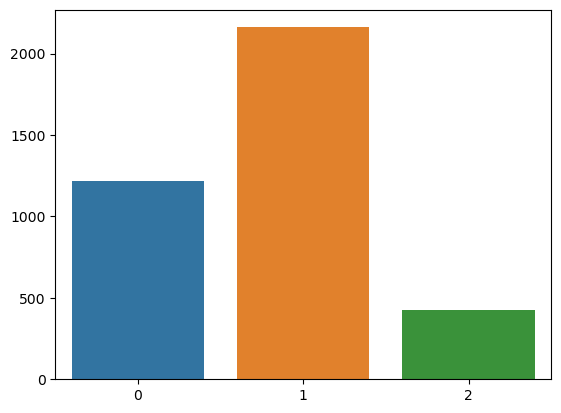

In [19]:
# Bar plot
sns.barplot(x = apple_df.sentiment.value_counts().index, 
             y = apple_df.sentiment.value_counts().values);

Mostly neutral. Combined with the airline dataset, we take note that the positive labels would still be underrepresented.

In [20]:
apple_df.head()

,sentiment,confidence,tweet
0,1,0.6264,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,1,0.8129,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,1,1.0000,My cat only chews @apple cords. Such an #Apple...
3,1,0.5848,I agree with @jimcramer that the #IndividualIn...
4,1,0.6474,Nobody expects the Spanish Inquisition #AAPL


So far, so good. On to the next... it's a big one.

## Kaggle Sentiment140 Data

In [21]:
# AWS code to load data from s3
obj = s3.get_object(Bucket = 'rawdatatweets',Key = 'Data/training.1600000.processed.noemoticon.csv')

# Load up data, ignore encoding errors
kaggle_df = pd.read_csv(obj['Body'], encoding='utf-8', encoding_errors='ignore', names=['target', 'ids', 'date', 'flag', 'user', 'text'])

kaggle_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [22]:
# Check for duplicates
kaggle_df.duplicated().value_counts()

False    1600000
dtype: int64

Good to not see duplicates. But no confidence levels? We may or may not end up using this data. But let's carry on for now.

In [23]:
# Drop all cols except sentiment and tweet
kaggle_df = kaggle_df[['target', 'text']]

# Rename cols to 'sentiment' and 'tweet'
kaggle_df.rename(columns={'target':'sentiment', 'text':'tweet'}, inplace=True)

# Inspect
kaggle_df.head(3)

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...


The data dictionary provided on the kaggle page lists the sentiment labels as follows:

`0. Negative`

`2. Neutral`

`4. Positive`

In [24]:
# Replace sentiment labels
kaggle_df.sentiment.replace([0, 2, 4],[0, 1, 2], inplace=True)

# Recast sentiment as integer
kaggle_df.sentiment = kaggle_df.sentiment.astype('int')

# Inspect
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   tweet      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [25]:
kaggle_df.sentiment.value_counts(dropna=False)

0    800000
2    800000
Name: sentiment, dtype: int64

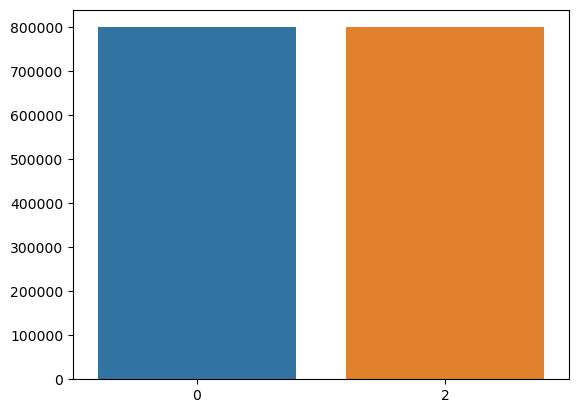

In [26]:
# Bar plot
sns.barplot(x = kaggle_df.sentiment.value_counts().index, 
             y = kaggle_df.sentiment.value_counts().values);

Hmm... No neutrals in this data. Another strike against this set.

Also, it's perfectly balanced? That's strange. Let's get a closer look at some sample tweets.

In [27]:
with pd.option_context('display.max_colwidth', None):
  display(kaggle_df[kaggle_df['sentiment'] == 0].sample(n=10))

,sentiment,tweet
705632,0,Getting in a car accident when you're in a parked car is just special...
664196,0,Waiting on the Ipod touch 2nd gen Jailbreak . itouch 2g always left fa last
254805,0,"@gfalcone601 hey, can you ask Tom to go to the front of the hotel with the guys and meet the fans? they're freezing on the rain for them!"
21093,0,@LordBlackadder Yes I agree with that one!Clue starts next week without Humph sadly but with @stephenfry as a host...
123425,0,Definitely unwell today. In the bathroom every few minutes. Feels like constant mini explosions in my stomach
247907,0,"hey guys i just woke up, it's six. i'm scared. it's raining. i live a sad life."
395672,0,@introducingemy Aww. Why so sad?
641736,0,"'love drunk' needs to come out now, i need martin johnson"
413901,0,"Got a Palm Pre this afternoon, but I still can't get it activated. Having trouble porting my Centennial number. Maybe tomorrow..."
602652,0,@JOEsus i was expecting mocha or vanilla oh well works too )))


In [28]:
with pd.option_context('display.max_colwidth', None):
  display(kaggle_df[kaggle_df['sentiment'] == 2].sample(n=10))

,sentiment,tweet
1495018,2,@rebeccaberg i still can't believe you tweeted me from downstairs.
835172,2,Alemannia Aachen 2 : 0 Fsv Frankfurt ... Yeah
1225884,2,@the_affair looking forward to seeing the new stuff. Whens it gonna be up? Take it you found a more convenient tripod in the end
1565044,2,at sonic with @erynbee @calebryan @iamrachelv i love summer nights!
844966,2,@archibaldcrane Thanks!
886966,2,@Silversmyth lol I just followed @bacon
1549017,2,Go to Lake Balaton on 26th of June! Drink alcohol and feel the sunshine
1092798,2,Hi Guys - hallo Leute ! M�chte mich abmelden - bin auf dem Weg ins Ausland. C u later - I'm on the way to UK. We stay in contact
1105861,2,@frankkkix sorry that was my fault and omg im twittering you through my phone!
1214920,2,"Had an amazingly gorgeous sunny BBQ yesterday,beautiful,with family hope everyone is ok x more fun in the sun today x"


## T4SA Data

This data is in two files:
    
    - t4sa_text_sentiment.tsv, which holds the sentiments and tweet ids
    - raw_tweets_text.csv, holding the tweet id and tweet text

We will loads in both and join them

In [29]:
obj = s3.get_object(Bucket = 'rawdatatweets',Key = 'Data/t4sa_text_sentiment.tsv')

# Load up tfsa labels, ignore encoding errors
tfsa_df = pd.read_csv(obj['Body'], encoding='utf-8', encoding_errors='ignore', delimiter='\t')

tfsa_df.head()

,TWID,NEG,NEU,POS
0,768096868504969216,0.049398,0.861395,0.089207
1,768097237620490241,0.028733,0.929554,0.041713
2,768097619281227776,0.006598,0.046810,0.946591
3,768097619285536768,0.032333,0.850945,0.116722
4,768097627686604801,0.008090,0.042331,0.949579


In [30]:
tfsa_df.shape

(1179957, 4)

In [31]:
obj = s3.get_object(Bucket = 'rawdatatweets',Key = 'Data/raw_tweets_text.csv')

# Load up tfsa tweets, ignore encoding errors
tweets_df = pd.read_csv(obj['Body'], encoding='utf-8', encoding_errors='ignore')

tweets_df.head()

,id,text
0,758014713804587008,RT @polarcomic: And surprise! the #RegularShow...
1,758014717990428672,RT @SweetBabyBellB: My unproblematic fav who k...
2,758014646716665857,RT @WhyLarryIsReal: I mean we know harry isn't...
3,758014655071526912,"RT @Eastbay: She's ready, resilient, and on ou..."
4,758014642526429184,RT @SheeeRatchet: find someone who loves you a...


In [32]:
tweets_df.shape

(3452663, 2)

In [33]:
# Set ID as index of both dataframes
tfsa_df.set_index('TWID')
tweets_df.set_index('id')

# Left join df's
tfsa_joined_df = tfsa_df.join(tweets_df, how='left')
tfsa_joined_df.shape

(1179957, 6)

In [34]:
# Delete df's from memory
del tfsa_df
del tweets_df

In [35]:
tfsa_joined_df.head(5)

,TWID,NEG,NEU,POS,id,text
0,768096868504969216,0.049398,0.861395,0.089207,758014713804587008,RT @polarcomic: And surprise! the #RegularShow...
1,768097237620490241,0.028733,0.929554,0.041713,758014717990428672,RT @SweetBabyBellB: My unproblematic fav who k...
2,768097619281227776,0.006598,0.046810,0.946591,758014646716665857,RT @WhyLarryIsReal: I mean we know harry isn't...
3,768097619285536768,0.032333,0.850945,0.116722,758014655071526912,"RT @Eastbay: She's ready, resilient, and on ou..."
4,768097627686604801,0.008090,0.042331,0.949579,758014642526429184,RT @SheeeRatchet: find someone who loves you a...


In [36]:
# Get sentiment from max of label columns, which list the confidence in each category
tfsa_joined_df['sentiment'] = tfsa_joined_df[['NEG', 'NEU', 'POS']].idxmax(axis=1)

# Get confidence level for each label
tfsa_joined_df['confidence'] = tfsa_joined_df[['NEG', 'NEU', 'POS']].max(axis=1)

tfsa_joined_df.head()

,TWID,NEG,NEU,POS,id,text,sentiment,confidence
0,768096868504969216,0.049398,0.861395,0.089207,758014713804587008,RT @polarcomic: And surprise! the #RegularShow...,NEU,0.861395
1,768097237620490241,0.028733,0.929554,0.041713,758014717990428672,RT @SweetBabyBellB: My unproblematic fav who k...,NEU,0.929554
2,768097619281227776,0.006598,0.046810,0.946591,758014646716665857,RT @WhyLarryIsReal: I mean we know harry isn't...,POS,0.946591
3,768097619285536768,0.032333,0.850945,0.116722,758014655071526912,"RT @Eastbay: She's ready, resilient, and on ou...",NEU,0.850945
4,768097627686604801,0.008090,0.042331,0.949579,758014642526429184,RT @SheeeRatchet: find someone who loves you a...,POS,0.949579


In [37]:
# Drop all cols except sentiment, confidence and tweet
tfsa_joined_df = tfsa_joined_df[['sentiment', 'confidence', 'text']]

# Rename cols
tfsa_joined_df.rename(columns={'text':'tweet'}, inplace=True)

# Replace sentiment labels
tfsa_joined_df.sentiment.replace(['NEG', 'NEU', 'POS'],[0, 1, 2], inplace=True)

# Recast sentiment as integer
tfsa_joined_df.sentiment = tfsa_joined_df.sentiment.astype('int')

# Inspect
tfsa_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179957 entries, 0 to 1179956
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   sentiment   1179957 non-null  int64  
 1   confidence  1179957 non-null  float64
 2   tweet       1179957 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 27.0+ MB


In [38]:
tfsa_joined_df.sentiment.value_counts(dropna=False)

1    629566
2    371341
0    179050
Name: sentiment, dtype: int64

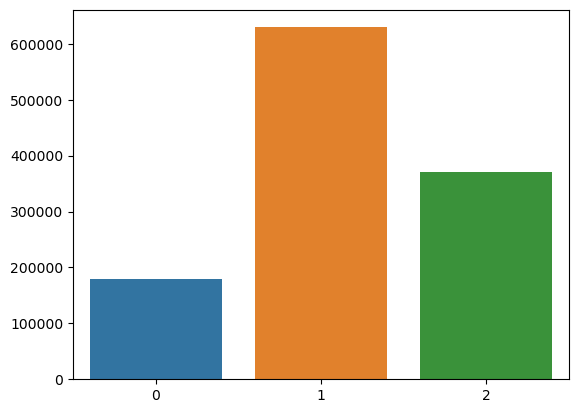

In [39]:
# Bar plot
sns.barplot(x = tfsa_joined_df.sentiment.value_counts().index, 
            y = tfsa_joined_df.sentiment.value_counts().values);

In [40]:
tfsa_joined_df.head()

,sentiment,confidence,tweet
0,1,0.861395,RT @polarcomic: And surprise! the #RegularShow...
1,1,0.929554,RT @SweetBabyBellB: My unproblematic fav who k...
2,2,0.946591,RT @WhyLarryIsReal: I mean we know harry isn't...
3,1,0.850945,"RT @Eastbay: She's ready, resilient, and on ou..."
4,2,0.949579,RT @SheeeRatchet: find someone who loves you a...


## Combine Them All

First, let's see what our data would look like with every tweet included.

In [41]:
combined_df = pd.concat([airline_df, apple_df, tfsa_joined_df, kaggle_df], ignore_index=True)

combined_df.head()

,sentiment,confidence,tweet
0,1,1.0000,@VirginAmerica What @dhepburn said.
1,2,0.3486,@VirginAmerica plus you've added commercials t...
2,1,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,@VirginAmerica and it's a really big bad thing...


In [42]:
combined_df.shape

(2798401, 3)

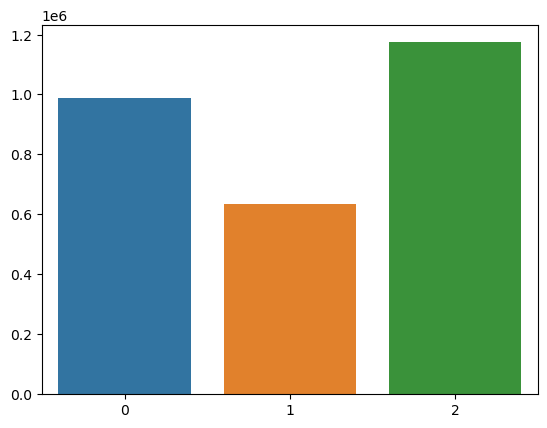

In [43]:
# Bar plot
sns.barplot(x = combined_df.sentiment.value_counts().index, 
            y = combined_df.sentiment.value_counts().values);

Now let's try removing the kaggle data and keeping only tweets whose confidence level is above 60%.

In [50]:
filtered_df = pd.concat([airline_df, apple_df, tfsa_joined_df], ignore_index=True)

filtered_df = filtered_df[filtered_df['confidence'] >= 0.5]

filtered_df.head()

,sentiment,confidence,tweet
0,1,1.0000,@VirginAmerica What @dhepburn said.
2,1,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,0,1.0000,@VirginAmerica it's really aggressive to blast...
4,0,1.0000,@VirginAmerica and it's a really big bad thing...
5,0,1.0000,@VirginAmerica seriously would pay $30 a fligh...


In [51]:
filtered_df.shape

(1169533, 3)

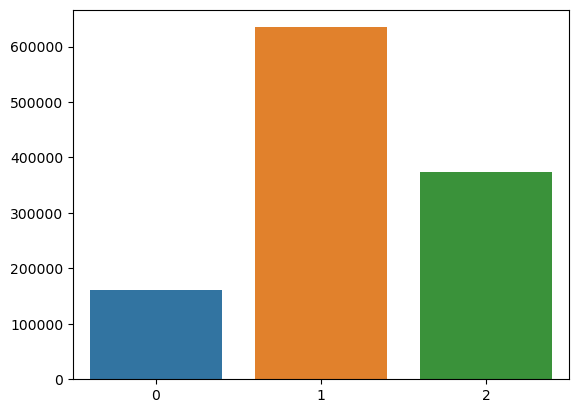

In [52]:
# Bar plot
sns.barplot(x = filtered_df.sentiment.value_counts().index, 
            y = filtered_df.sentiment.value_counts().values);

Not enough negative tweets making it through that filter. We prefer the target distribution of the entire data set, so we'll go with that one. Let's save it down to pull into our next notebook.

In [47]:
combined_df = combined_df[['sentiment', 'tweet']]

combined_df.head()

,sentiment,tweet
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...


In [48]:
# Write df to csv
combined_df.to_csv('../data/combined_data.csv')

# Upload file to s3
# s3 = boto3.resource('s3')
# s3.meta.client.upload_file('../data/combined_data', 'rawdatatweets', 'combined_data')